Title: Taking a look at Vehicular/Pedestrian accidents in the neighbourhoods of Vancouver

Introduction: Pedestrians are some of the most vulnerable users of roadways. On average, in British Columbia, around 50 pedestrians are killed and 2,400 are injured in around 2,700 crashes every year, based on a five-year average of data collected by ICBC between 2016 and 2020 (ICBC, 2021).​​ Nearly half of these deaths occur between October and January, likely due to decreased daylight and poor weather conditions. Governments and law enforcement are using various safety campaigns to try and deal with these issues, it is possible that more can be done to reduce pedestrian deaths in key regions in Metro Vancouver. 
 
The question understudy for our project is: "Are certain neighbourhoods more prone to vehicle collisions in the City of Vancouver?" The dataset we are planning on using was made available to us by the VPD, and it contains information on all crimes committed from 2003 to 2022 (VPD, 2022). We intend to look at neighbourhood-specific data across the city and we will specifically look at the “Vehicle Collision or Pedestrian Struck with Fatality” and “Vehicle Collision or Pedestrian Struck with Injury” related data. While the data values include both vehicle-to-vehicle collisions and pedestrian/cyclist strikes together, the description notes that vehicle-to-vehicle incidents are fewer in number when compared to the overall data set. We want to see if there is any discernible pattern for the neighbourhoods that have higher collision rates, such as if the neighbourhoods have lower government funding, lower socioeconomic status, or if collision rates are more evenly spread.
 
An article by Sarah Fecht in Scientific American that looked into road designs in Montreal found that “traffic injuries are four to six times higher in low-income areas of Montreal, compared with wealthy neighbourhoods” (Fecht, n.d.). Fecht notes that there may be “many explanations for social inequalities in traffic injuries, including differences in the prevalence of drunk driving, use of helmets and safety restraints, and driving speeds”. However, citing a 2011 study on the influence of traffic volume and road design (Morency et al., 2012), Fetch suggests that “street environment” may also carry a large part of the blame”. As this would be a serious concern that could be mitigated through direct intervention, we wanted to further explore whether this may also be occurring in Vancouver as well.
 
We plan on using the mean number of collisions and the standard deviation (SD) to approach this question. The mean will highlight the average number of collisions, and having a lower SD would indicate that our mean value is appropriate to make conclusions from.  as the values are all clustered closer to it. We will also compare the median against the mean to explore the presence of any outliers that may affect our results. If that is the case, we will likely use the median value instead in order to reduce the effect of outliers in the data.

In [28]:
#Preliminary Results: 

set.seed(1)
install.packages("tidyverse")
library(tidyverse)


The downloaded binary packages are in
	/var/folders/pv/20ft3yp91ml1chtyjtpmhtqh0000gn/T//RtmpEdUHuL/downloaded_packages


TYPE,NEIGHBOURHOOD
<chr>,<chr>
Vehicle Collision or Pedestrian Struck (with Fatality),Central Business District
Vehicle Collision or Pedestrian Struck (with Fatality),Central Business District
Vehicle Collision or Pedestrian Struck (with Fatality),West End
Vehicle Collision or Pedestrian Struck (with Fatality),Sunset
Vehicle Collision or Pedestrian Struck (with Fatality),Kensington-Cedar Cottage
Vehicle Collision or Pedestrian Struck (with Fatality),Sunset


Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"


[1] 1110.72

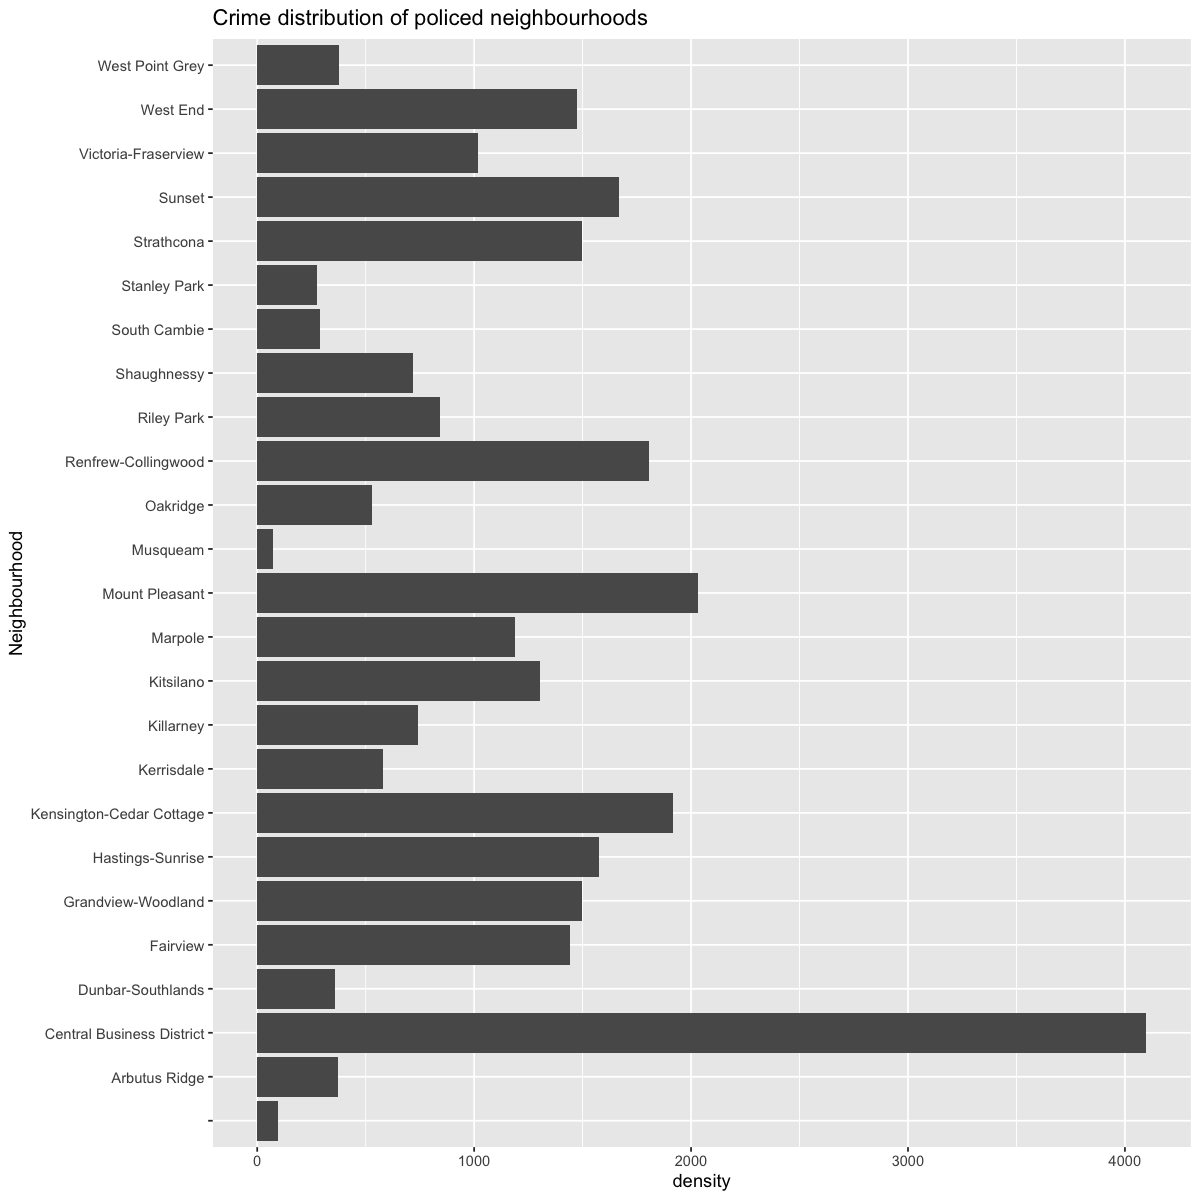

In [29]:
dataset <- read.csv("crime_data.csv") 

dataset <- select(dataset, TYPE, NEIGHBOURHOOD,) %>%
    group_by(NEIGHBOURHOOD) %>%
    filter(TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)" | 
    TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)")
head(dataset)

options(repr.plot.width = 10, repr.plot.height = 10)
crime_dist_neighbours <- dataset %>% 
    ggplot() + 
    geom_histogram(aes(x = NEIGHBOURHOOD), stat = "count")+
    xlab("Neighbourhood") +
    ylab("density") +
    ggtitle("Crime distribution of policed neighbourhoods") +
    coord_flip()
crime_dist_neighbours


mean_crime_rate <- length(dataset$TYPE) / length(unique(dataset$NEIGHBOURHOOD))
mean_crime_rate 
#This is the "mean" crime rate per neighbourhood policed.

Methods: Plan
As our source data was obtained through the official government database, our analysis is representative of the true population and is relatively unbiased. While some types of crime may often go unreported (Baumer & Lauritsen, 2010), we feel that vehicle collisions are more often reported to police and insurance agencies, and thus this data is reasonably representative. The reproducibility of our results will also ensure that our conclusions are trustworthy and reliable.
 
However, these results will not be sufficient for a stakeholder and a more thorough analysis will be required. We plan to perform statistical testing, through the Kruskal-Wallis Test at a 95% confidence interval, as we develop our project. Namely:
$H_0:$ The rate of vehicle/pedestrian accidents occur for all neighbourhoods all come from the same distribution
$H_A:$ The rate of vehicle/pedestrian accidents for all neighbourhoods do not all come from the same distribution.
 
Through our preliminary results, we expect to reject $H_0$ at a 5% significance level.
	
We expect to get a better understanding of how our current road designs are affecting collision rates in the city. These results can help city planners determine if certain neighbourhoods require additional safety infrastructure in addition to determining which areas require additional resources to reduce collision rates immediately. This information may also motivate the City of Vancouver to prioritize renewal plans for older areas and “poorer” areas of the city. This information could also be used by researchers developing self-driving technologies to reduce the chance of the vehicle being involved in such an incident. Furthermore, this project may lead to further questions on other factors that also increase the likelihood of vehicle collisions, such as specific weather or daylight conditions. This would account for a possible confounding variable.


References:
Baumer, E. P., & Lauritsen, J. L. (2010). Reporting Crime to the Police, 1973–2005: A Multivariate Analysis of Long-Term Trends in the National Crime Survey (ncs) and National Crime Victimization Survey (ncvs)*. Criminology, 48(1), 131–185. https://doi.org/10.1111/j.1745-9125.2010.00182.x
Fecht, S. (n.d.). Accident-Zone: Poorer Neighborhoods Have Less-Safe Road Designs. Scientific American. Retrieved March 5, 2022, from https://www.scientificamerican.com/article/accident-zone-poorer-neighborhoods/
ICBC. (2021, October 19). ICBC warns about seasonal spike in pedestrian crashes. https://www.icbc.com:443/about-icbc/newsroom/Pages/2021-oct19.aspx
Morency, P., Gauvin, L., Plante, C., Fournier, M., & Morency, C. (2012). Neighborhood Social Inequalities in Road Traffic Injuries: The Influence of Traffic Volume and Road Design. American Journal of Public Health, 102(6), 1112–1119. https://doi.org/10.2105/AJPH.2011.300528
VPD. (2022). Vancouver Police Department Open Data. https://geodash.vpd.ca/opendata/#
